In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import  XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb 
from sklearn.model_selection import GridSearchCV

In [436]:
pf=pd.read_csv('/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv')
pf

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [437]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [438]:
data=pf.dropna()
data

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [439]:
data_with_label=data[['absolute_magnitude','estimated_diameter_min','estimated_diameter_max','relative_velocity','miss_distance','is_hazardous']]
data=data[['absolute_magnitude','estimated_diameter_min','estimated_diameter_max','relative_velocity','miss_distance']]
data

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07
...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06


minimum absolute magnitude is  9.25
maximum absolute magnitude is 33.58


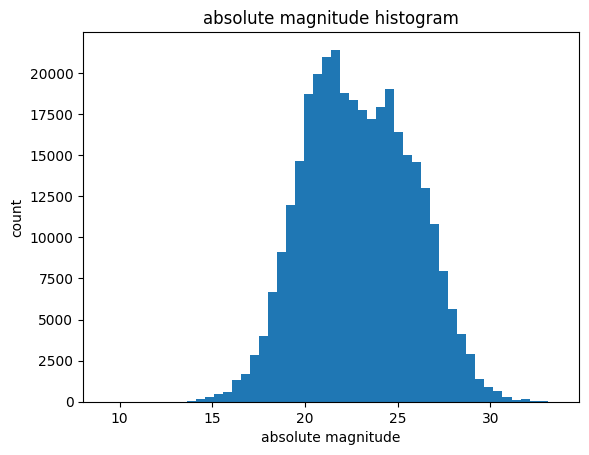

In [440]:
# absolute magnitude distribution

plt.hist(data['absolute_magnitude'],bins=50)
plt.title("absolute magnitude histogram")
plt.xlabel("absolute magnitude")
plt.ylabel("count")
print('minimum absolute magnitude is ',data['absolute_magnitude'].min())
print('maximum absolute magnitude is',data['absolute_magnitude'].max())

absolute magnitude seems to be normally distributed

estimated_diameter_minimum is  0.0005111578 km
estimated_diameter_maximum is 37.5452479361 km


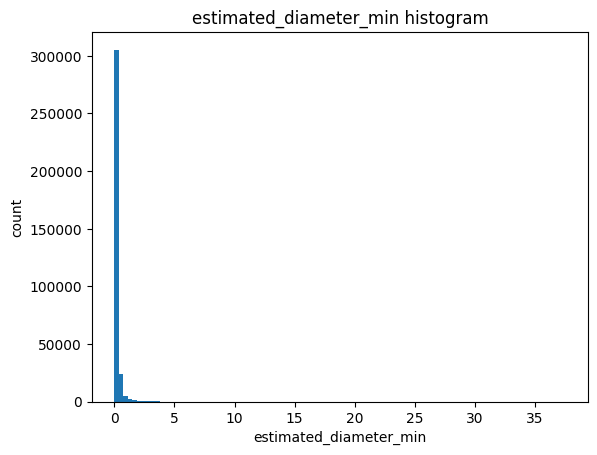

In [441]:
# estimated_diameter_min distribution

plt.hist(data['estimated_diameter_min'],bins=100)
plt.title("estimated_diameter_min histogram")
plt.xlabel("estimated_diameter_min")
plt.ylabel("count")
print('estimated_diameter_minimum is ',data['estimated_diameter_min'].min(),'km')
print('estimated_diameter_maximum is',data['estimated_diameter_min'].max(),'km')

most of the asteroids seem to have diamater below 500 meters (minimum estimated)

estimated_diameter_minimum is  0.0011429835 km
estimated_diameter_maximum is 83.9537266171 km


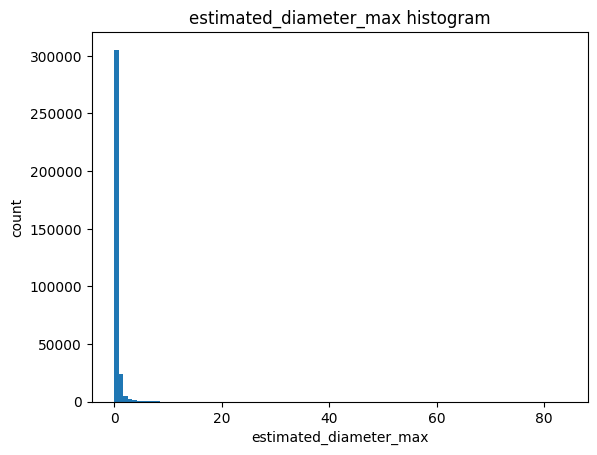

In [442]:
# estimated_diameter_max distribution

plt.hist(data['estimated_diameter_max'],bins=100)
plt.title("estimated_diameter_max histogram")
plt.xlabel("estimated_diameter_max")
plt.ylabel("count")
print('estimated_diameter_minimum is ',data['estimated_diameter_max'].min(),'km')
print('estimated_diameter_maximum is',data['estimated_diameter_max'].max(),'km')

most of the asteroids seem to have diamater below 1 km (maximum estimated)

relative_velocity_minimum is  203.34643253 km/h
relative_velocity_maximum is 291781.1066131202 km/h


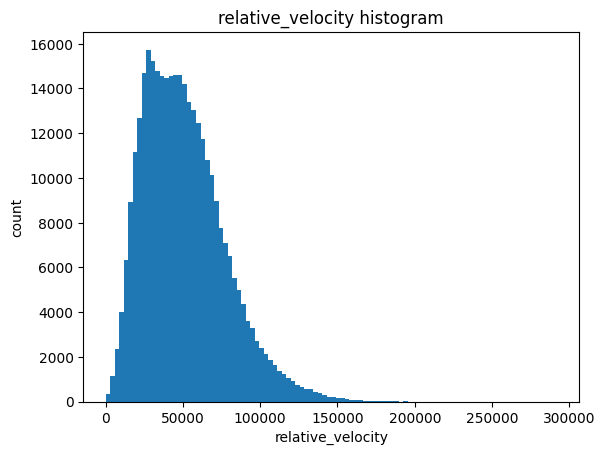

In [443]:
# rel_vel distribution

plt.hist(data['relative_velocity'],bins=100)
plt.title("relative_velocity histogram")
plt.xlabel("relative_velocity")
plt.ylabel("count")
print('relative_velocity_minimum is ',data['relative_velocity'].min(),'km/h')
print('relative_velocity_maximum is',data['relative_velocity'].max(),'km/h')

miss_distance_minimum is  6745.532515957 km
miss_distance_maximum is 74798651.4521972 km


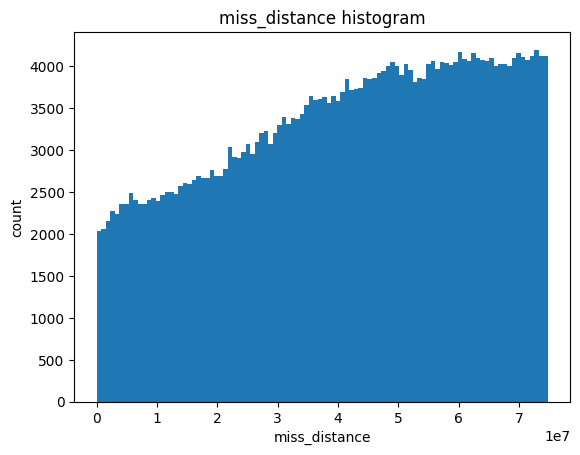

In [444]:
# miss_distance distribution

plt.hist(data['miss_distance'],bins=100)
plt.title("miss_distance histogram")
plt.xlabel("miss_distance")
plt.ylabel("count")
print('miss_distance_minimum is ',data['miss_distance'].min(),'km')
print('miss_distance_maximum is',data['miss_distance'].max(),'km')

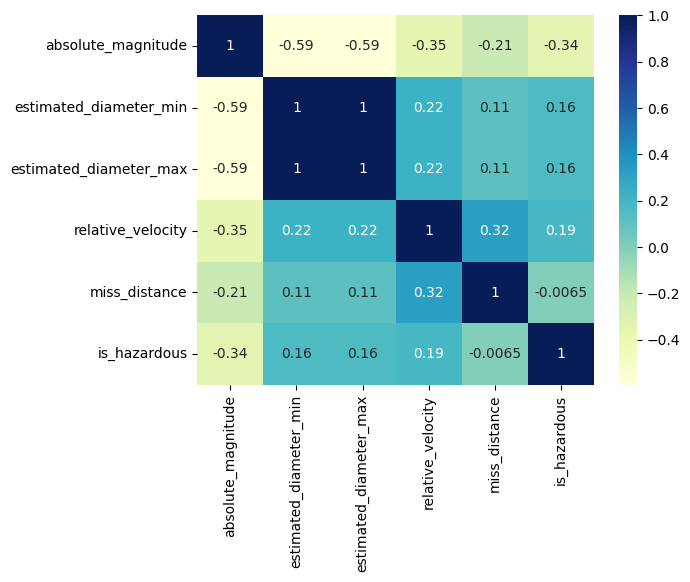

In [445]:
# corelation matrix and heatmap

dataplot = sb.heatmap(data_with_label.corr(), cmap="YlGnBu", annot=True) 

There is a perfect correlation between minimum and maximum estimated diameter of an asteroid. This means they are related by an analytical function.
Absolute magnitude generally decreases (i.e, luminosity increases) as the diameter of an asteroid increase. This is expected because more surface area of the asteroid will reflect more light.

Text(0, 0.5, 'est_dia_max')

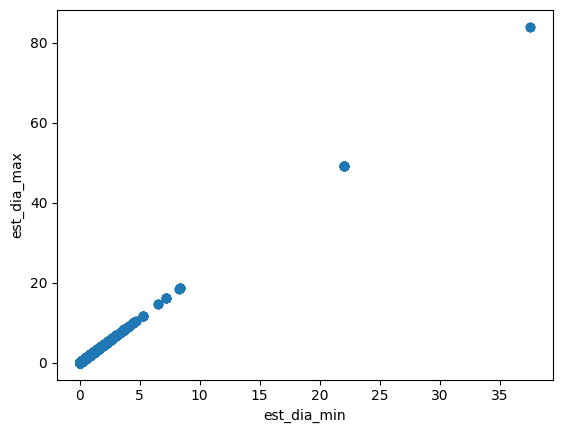

In [446]:
# let's check whether there is a relationship between minimum and maximum estimated diameter of an asteroid

est_dia_min=data['estimated_diameter_min']
est_dia_max=data['estimated_diameter_max']
plt.scatter(est_dia_min,est_dia_max)
plt.xlabel("est_dia_min")
plt.ylabel("est_dia_max")

Thus there is a linear relationship between est_dia_min and est_dia_max

Text(0, 0.5, 'abs_magn')

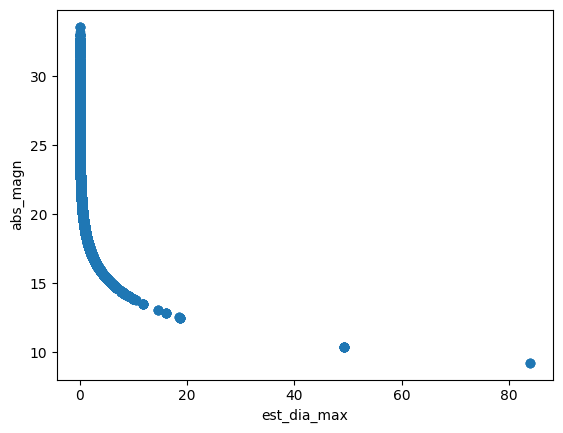

In [447]:
# let's check whether there is a relationship between absolute magnitude and diameter of an asteroid

abs_magn=data['absolute_magnitude']
plt.scatter(est_dia_max,abs_magn)
plt.xlabel("est_dia_max")
plt.ylabel("abs_magn")

Thus,bigger asteroids tend to be more luminous

In [448]:
# encoding labels

from sklearn.preprocessing import LabelEncoder

y=data_with_label[['is_hazardous']]
y=LabelEncoder().fit_transform(y)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.36900
[1]	validation_0-logloss:0.34822
[2]	validation_0-logloss:0.33080
[3]	validation_0-logloss:0.31632
[4]	validation_0-logloss:0.30377
[5]	validation_0-logloss:0.29287
[6]	validation_0-logloss:0.28331
[7]	validation_0-logloss:0.27495
[8]	validation_0-logloss:0.26755
[9]	validation_0-logloss:0.26116
[10]	validation_0-logloss:0.25548
[11]	validation_0-logloss:0.25045
[12]	validation_0-logloss:0.24586
[13]	validation_0-logloss:0.24179
[14]	validation_0-logloss:0.23834
[15]	validation_0-logloss:0.23534
[16]	validation_0-logloss:0.23273
[17]	validation_0-logloss:0.23016
[18]	validation_0-logloss:0.22799
[19]	validation_0-logloss:0.22590
[20]	validation_0-logloss:0.22402
[21]	validation_0-logloss:0.22240
[22]	validation_0-logloss:0.22089
[23]	validation_0-logloss:0.21942
[24]	validation_0-logloss:0.21819
[25]	validation_0-logloss:0.21702
[26]	validation_0-logloss:0.21596
[27]	validation_0-logloss:0.21502
[28]	validation_0-logloss:0.21426
[29]	validation_0-loglos

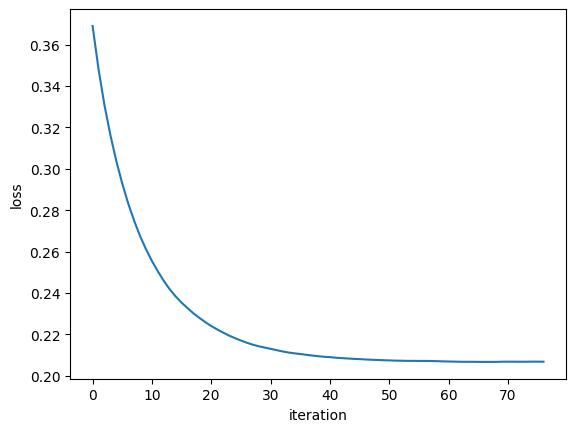

In [449]:
# xgboost and validation loss

# random_state
rs=7

X_train, X_val, y_train, y_val = train_test_split(data, y, train_size = 0.8, random_state = rs)
model = XGBClassifier(n_estimators= 500,learning_rate=0.1, max_depth=23, objective='binary:logistic',random_state=rs)
model.fit(X_train,y_train, eval_set = [(X_val,y_val)],early_stopping_rounds = 10)
logloss=model.evals_result()['validation_0']['logloss']
plt.plot(logloss)
plt.xlabel("iteration")
plt.ylabel("loss")

# best iteration
print('best iteration is', model.best_iteration)

# accuracy
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(model.predict(X_val),y_val):.4f}")

The model gives an accuracy of 0.9


f1 score is 0.5337157246782317
recall score is 0.4375
precison score is 0.6841822094691535


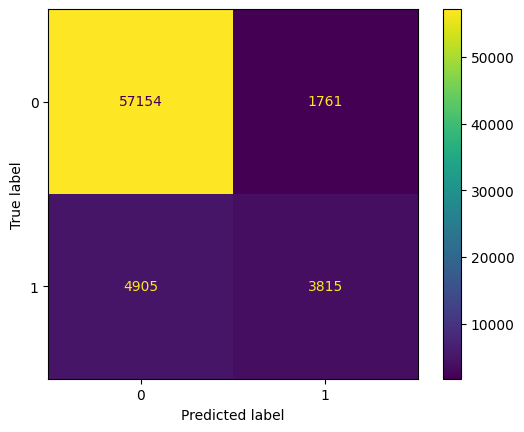

In [450]:
# confusion matrix and f1 score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

ConfusionMatrixDisplay(confusion_matrix(y_val,model.predict(X_val))).plot()

print('f1 score is',f1_score(y_val,model.predict(X_val)))
print('recall score is',recall_score(y_val,model.predict(X_val)))
print('precison score is',precision_score(y_val,model.predict(X_val)))


The recall score is too low. 

According to NEO basics,

"Potentially Hazardous Asteroids (PHAs) are currently defined based on parameters that measure the asteroid's potential to make threatening close approaches to the Earth. Specifically, all asteroids with an Earth Minimum Orbit Intersection Distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less are considered PHAs. In other words, asteroids that can't get any closer to the Earth (i.e., MOID) than 0.05 au (roughly 7,480,000 km or 4,650,000 mi) or are smaller than about 140 m (~500 ft) in diameter (i.e., H = 22.0 with assumed albedo of 14%) are not considered PHAs."

So, let's remove the following asteroids from the dataset:

1) Asteroids with miss_distance greater than 7,480,000 km
2) Asteroids with maximum estimated diameter less than 140 meter or 0.14 km
3) Asteroids having absolute magnitude (H) value greater than 22 

In [451]:
# Removing according to criterion by NEO basics

data=(pd.read_csv('/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv')).dropna()
filtered_data=data[(data['absolute_magnitude'] <= 22) & (data['estimated_diameter_max'] >= 0.14) & (data['miss_distance'] < 7480000) ]
filtered_data



,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
8,3836942,(2018 YH),21.70,0.121494,0.271669,Earth,37424.548382,5.657727e+06,True
19,2357439,357439 (2004 BL86),19.29,0.368600,0.824214,Earth,59133.776590,7.266532e+06,True
629,2138175,138175 (2000 EE104),20.47,0.214070,0.478674,Earth,39374.611273,6.146616e+06,True
637,3369614,(2007 DS84),20.80,0.183889,0.411188,Earth,27128.816057,7.007547e+06,True
753,2363116,363116 (2001 GQ2),20.32,0.229380,0.512909,Earth,65654.217661,7.098501e+06,True
...,...,...,...,...,...,...,...,...,...
337406,2517681,517681 (2015 DE198),18.86,0.449319,1.004708,Earth,51051.467322,7.029328e+06,True
337460,3989301,(2020 BP13),21.15,0.156515,0.349977,Earth,24494.230348,5.813596e+06,True
337477,2679656,679656 (2020 BP13),21.07,0.162388,0.363111,Earth,24494.230949,5.813595e+06,True
337641,54427934,(2024 CR9),19.48,0.337719,0.755162,Earth,26560.849520,7.366410e+06,True


2339 out of 2371 candidates are hazardous 

Text(0.5, 1.0, 'most_hazardous_asteroids')

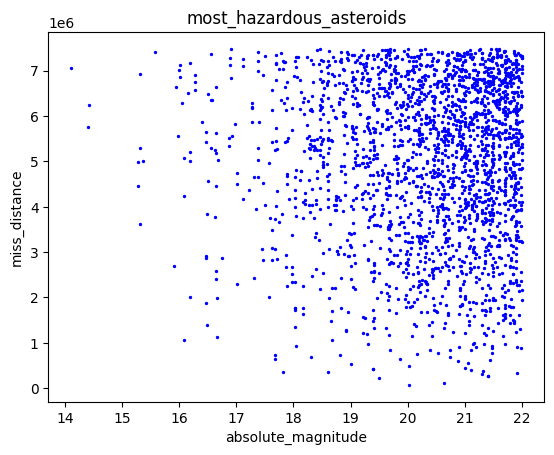

In [452]:
# Let's plot most hazardous candidates

plt.scatter(filtered_data['absolute_magnitude'],filtered_data['miss_distance'],marker="o",s=2,c='b')
plt.xlabel('absolute_magnitude')
plt.ylabel('miss_distance')
plt.title('most_hazardous_asteroids')

In the above plot, the points that are more closer to origin are more hazaradous.
i.e, the asteroids that are bigger and closer to earth are deemed more hazardious. 

Text(0.5, 1.0, 'entire_data')

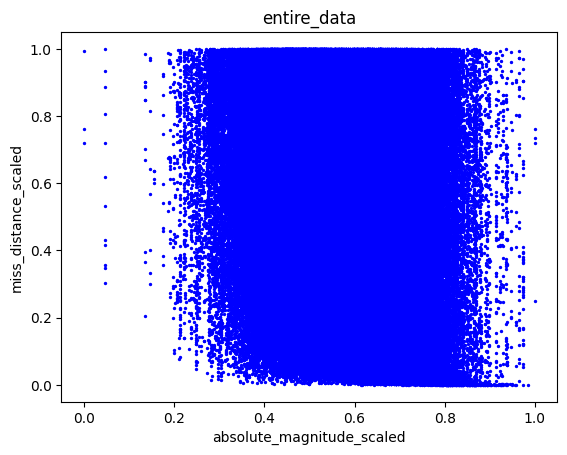

In [453]:
# Plotting on entire data

from sklearn.preprocessing import MinMaxScaler

# Selecting only two features: absolute magnitude and missing distance

data_two_features=data[['absolute_magnitude','miss_distance']]

# Scaling features with MinMaxScaler

data_two_features_scaled=(MinMaxScaler()).fit_transform(data_two_features)


plt.scatter(data_two_features_scaled[:,0],data_two_features_scaled[:,1],marker="o",s=2,c='b')
plt.xlabel('absolute_magnitude_scaled')
plt.ylabel('miss_distance_scaled')
plt.title('entire_data')

Let's define another feature that calculates distance of the point from the origin in the above plot

new_feature=sqrt(miss_distance ^2+absolute_magnitude^2)


In [454]:
# new_feature

new_feature=np.sqrt((data_two_features_scaled[:,0])**2+(data_two_features_scaled[:,1])**2)


new_feature minimum is 0.22056127945877288
new_feature maximum is 1.3834006246613186


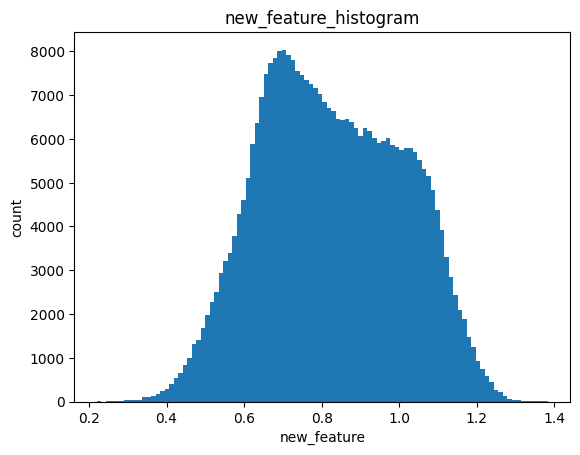

In [455]:
# Histogram of the new feature

plt.hist(new_feature,bins=100)
plt.title("new_feature_histogram")
plt.xlabel("new_feature")
plt.ylabel("count")
print('new_feature minimum is',new_feature.min())
print('new_feature maximum is',new_feature.max())





In [456]:
# lower values of new_feature are more likely to predict y=1 
# the higher value of new_feature (say greater than 1.1) are more likely to predict label y=0

length=0
count=0

for i in range (len(y)):
    if new_feature[i] > 1.1:
        length=length+1
        if y[i]==0:
            count=count+1

pp=count/length
print(pp)
print(length)


0.9789660729782222
24199


Thus there are around 24199 points whose new_feature value is greater than 1.1 and most of these are non hazardious

In [457]:
# feature scaling, new_features adding 

X=data[['absolute_magnitude','estimated_diameter_min','estimated_diameter_max','relative_velocity','miss_distance']]
X=pd.DataFrame((MinMaxScaler()).fit_transform(X),columns = X.columns)

# adding distance from the origin of data point (on absolute magnitude vs miss distance plot) as a new feature 

nfdf = pd.DataFrame(new_feature,columns =['new_feature'])
X=pd.concat([X, nfdf],axis=1)

# output label

y=LabelEncoder().fit_transform(data[['is_hazardous']])

X.head()


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,new_feature
0,0.406494,0.010506,0.010506,0.245362,0.777315,0.877187
1,0.380189,0.014112,0.014112,0.376388,0.745994,0.837288
2,0.501439,0.003617,0.003617,0.084582,0.898495,1.028948
3,0.467735,0.005283,0.005283,0.269865,0.406323,0.619576
4,0.552815,0.002028,0.002028,0.191486,0.843833,1.008791


In [458]:
# Neo-basics

# absolute magnitude

abs_magn_neo=22
abs_magn_min=(data[['absolute_magnitude']]).min()
abs_magn_max=(data[['absolute_magnitude']]).max()
abs_magn_range=abs_magn_max-abs_magn_min

abs_magn_threshold=(abs_magn_neo-abs_magn_min)/abs_magn_range

# max_est_dia

max_est_dia_neo=0.14
max_est_dia_min=(data['estimated_diameter_max']).min()
max_est_dia_max=(data['estimated_diameter_max']).max()
max_est_dia_range=max_est_dia_max-max_est_dia_min

max_est_dia_threshold=(max_est_dia_neo-max_est_dia_min)/max_est_dia_range

# miss distance

miss_dist_neo=7480000
miss_dist_min=(data['miss_distance']).min()
miss_dist_max=(data['miss_distance']).max()
miss_dist_range=miss_dist_max-miss_dist_min

miss_dist_threshold=(miss_dist_neo-miss_dist_min)/miss_dist_range

# creting new features that measure deviation from these threshold values 

dev_abs_magn_neo=(X[['absolute_magnitude']]-abs_magn_threshold).rename(columns={"absolute_magnitude": "dev_abs_magn_neo"})
dev_dia_max_neo=(X[['estimated_diameter_max']]-max_est_dia_threshold).rename(columns={"estimated_diameter_max": "dev_dia_max_neo"})
dev_miss_dist_neo=(X[['miss_distance']]-miss_dist_threshold).rename(columns={"miss_distance": "dev_miss_dist_neo"})

# adding new features

X=pd.concat([X,dev_abs_magn_neo,dev_dia_max_neo,dev_miss_dist_neo],axis=1)
X.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,new_feature,dev_abs_magn_neo,dev_dia_max_neo,dev_miss_dist_neo
0,0.406494,0.010506,0.010506,0.245362,0.777315,0.877187,-0.117550,0.008852,0.677394
1,0.380189,0.014112,0.014112,0.376388,0.745994,0.837288,-0.143855,0.012458,0.646073
2,0.501439,0.003617,0.003617,0.084582,0.898495,1.028948,-0.022606,0.001963,0.798574
3,0.467735,0.005283,0.005283,0.269865,0.406323,0.619576,-0.056309,0.003629,0.306403
4,0.552815,0.002028,0.002028,0.191486,0.843833,1.008791,0.028771,0.000374,0.743912


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.36905
[1]	validation_0-logloss:0.34833
[2]	validation_0-logloss:0.33105
[3]	validation_0-logloss:0.31633
[4]	validation_0-logloss:0.30399
[5]	validation_0-logloss:0.29334
[6]	validation_0-logloss:0.28391
[7]	validation_0-logloss:0.27560
[8]	validation_0-logloss:0.26830
[9]	validation_0-logloss:0.26197
[10]	validation_0-logloss:0.25637
[11]	validation_0-logloss:0.25151
[12]	validation_0-logloss:0.24695
[13]	validation_0-logloss:0.24302
[14]	validation_0-logloss:0.23963
[15]	validation_0-logloss:0.23650
[16]	validation_0-logloss:0.23374
[17]	validation_0-logloss:0.23136
[18]	validation_0-logloss:0.22916
[19]	validation_0-logloss:0.22686
[20]	validation_0-logloss:0.22512
[21]	validation_0-logloss:0.22334
[22]	validation_0-logloss:0.22182
[23]	validation_0-logloss:0.22046
[24]	validation_0-logloss:0.21918
[25]	validation_0-logloss:0.21805
[26]	validation_0-logloss:0.21698
[27]	validation_0-logloss:0.21607
[28]	validation_0-logloss:0.21527
[29]	validation_0-loglos

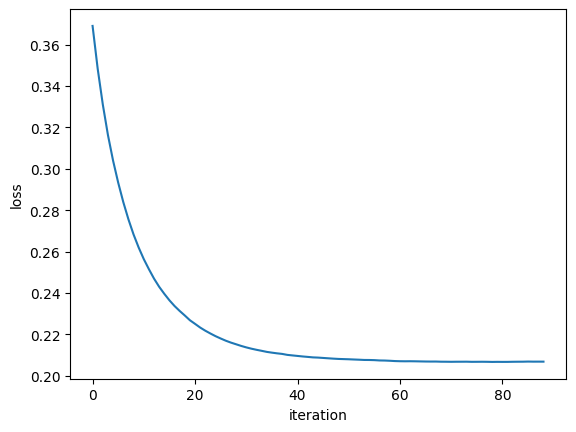

In [459]:
# runnnig xgboost again

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = rs)
model = XGBClassifier(n_estimators= 1000,learning_rate=0.1, max_depth=23, objective='binary:logistic',random_state=rs)
model.fit(X_train,y_train, eval_set = [(X_val,y_val)],early_stopping_rounds = 10)
logloss=model.evals_result()['validation_0']['logloss']
plt.plot(logloss)
plt.xlabel("iteration")
plt.ylabel("loss")

# best iteration
print('best iteration is', model.best_iteration)

# accuracy
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(model.predict(X_val),y_val):.4f}")

adding new_feature didn't change much.


End 